In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [7]:
kospi200 = pd.read_csv("./data/data.csv", encoding="cp949")
kospi200 = kospi200[kospi200.columns[:2]]
kospi200["종목코드"] = kospi200["종목코드"].map('{:06d}'.format)

name_dict = { i : j for i, j in zip(kospi200["종목명"], kospi200["종목코드"]) }
code_dict = { j : i for i, j in zip(kospi200["종목명"], kospi200["종목코드"]) }

In [8]:
import pickle
with open('raw_data_20180824.pickle','rb') as handle:
    raw_data = pickle.load(handle)

In [9]:
party_df = pd.read_csv('party_df.csv')
party_df["종목코드"] = party_df["종목코드"].map('{:06d}'.format)

In [10]:
del_li = [key for key, df in raw_data.items() if len(df) < 252*2]
for code in del_li:
    del raw_data[code]

In [11]:
print([code_dict[i] for i in del_li],end=" ")

['BGF리테일', 'HDC현대산업개발', 'SK케미칼', '넷마블', '두산밥캣', '삼성바이오로직스', '오리온', '현대중공업지주', '효성중공업'] 

In [380]:
trial = 0
for code in raw_data.keys():
    trial += 1
    """
    X
    """
    raw_data[code]["pct_change"] = raw_data[code].Close.pct_change().shift(1)
    for i in range(3, 31):
        raw_data[code]["close_ma_{}".format(i)] = raw_data[code].Close.rolling(window = i).mean().shift(1)
        raw_data[code]["volume_ma_{}".format(i)] =  raw_data[code].Volume.rolling(window = i).mean().shift(1)
    for i in [7, 21, 30, 60, 90, 91, 100, 120]:
        raw_data[code]["his_vol_{}".format(i)] = raw_data[code]["pct_change"].fillna(0).rolling(window = i).std()*(252**0.5)
    """
    Y
    """
    
    raw_data[code] = raw_data[code].assign(Y1 = raw_data[code].Close - raw_data[code].close_ma_7.shift(1))
    raw_data[code] = raw_data[code].assign(Y2 =
                                           raw_data[code]["pct_change"] - 
                                           raw_data[code]["pct_change"].rolling(window = 7).mean().shift(1))
    raw_data[code] = raw_data[code].assign(Y3 = raw_data[code].Close.rolling(window=7).mean() - 
                                           raw_data[code].Close.shift(1).rolling(window=7).mean())
    
    raw_data[code] = raw_data[code].assign(Y1 = np.where(raw_data[code].Y1>=0, 1, 0))
    raw_data[code] = raw_data[code].assign(Y2 = np.where(raw_data[code].Y2>=0, 1, 0))
    raw_data[code] = raw_data[code].assign(Y3 = np.where(raw_data[code].Y3>=0, 1, 0))
    """
    Drop NaN
    """
    raw_data[code] = raw_data[code].dropna(axis=0)
    print(trial)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193


In [ ]:
raw_data['005930'].Close.rolling(window=7).sum() - raw_data['005930'].Close.shift(1).rolling(window=7).sum()

In [261]:
len(del_li2)

16

In [279]:
len(raw_data.keys())

193

In [298]:
del_li2 = [key for key, df in data.items() if (df[['Close','Volume','Open']].duplicated().sum()>20)]

In [381]:
len(del_li2)

16

In [382]:
print([code_dict[i] for i in del_li2],end=" ")

['BGF', 'HDC', 'SK디스커버리', '대우조선해양', '대한항공', '동아쏘시오홀딩스', '동양', '롯데지주', '오리온홀딩스', '우리은행', '쿠쿠홀딩스', '팬오션', '한국타이어월드와이드', '한라홀딩스', '현대중공업', '효성'] 

In [383]:
for code in del_li2:
    del raw_data[code]

In [384]:
len(data)

177

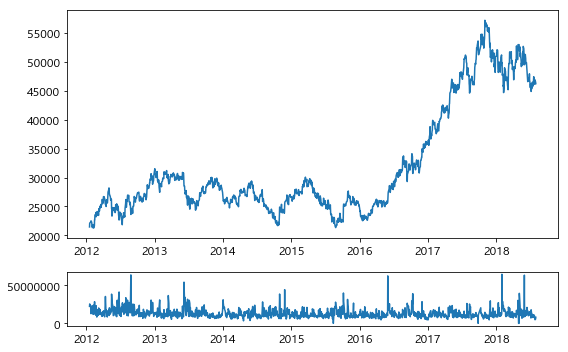

In [302]:
fig = plt.figure(figsize=(8, 5))

top_axes = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
bottom_axes = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom_axes.get_yaxis().get_major_formatter().set_scientific(False)

top_axes.plot(data['005930'].loc['2012-01-19':].index, 
              data['005930'].loc['2012-01-19':]['Close'], label='Close')
bottom_axes.plot(data['005930'].loc['2012-01-19':].index, 
                 data['005930'].loc['2012-01-19':]['Volume'])

plt.tight_layout()
plt.show()

# Make a Technical Indicator

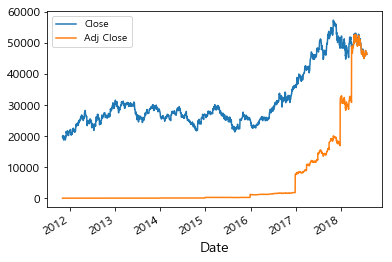

In [172]:
data['005930']['Close'].plot()
data['005930']['Adj Close'].plot()
plt.legend()

In [385]:
def GetMACD(df, short_ma=12, long_ma=26, signal_period=9):
    ewm_12 = df['Close'].ewm(span = short_ma, min_periods = short_ma - 1).mean()
    ewm_26 = df['Close'].ewm(span = long_ma, min_periods = long_ma - 1).mean()
    df = df.assign(MACD = ewm_12 - ewm_12)
    df = df.assign(MACDSignal = df['MACD'].ewm(span = signal_period, min_periods = signal_period-1).mean())
    df = df.assign(MACDDiff = df['MACD'] - df['MACDSignal'])
    return df
    
def GetStochastic(df, n=14):
    size = len(df)
    if size < n:
        raise SystemExit('입력값이 기간보다 작음')
    tempSto_K = []
    for i in range(len(df)):
        if i >= n-1:
            tempUp = df.Close.iloc[i] - df.Close.iloc[i-(n-1):i+1].min()
            tempDown = df.Close.iloc[i-(n-1):i+1].max() - df.Close.iloc[i-(n-1):i+1].min()
            tempSto_K.append((tempUp/tempDown) * 100)
        else:
            tempSto_K.append(0)
    df = df.assign(Sto_K = pd.Series(tempSto_K, index=df.index))
    
    df = df.assign(Sto_D = df['Sto_K'].rolling(window = 3).mean())
    df = df.assign(Sto_SlowD = df['Sto_D'].rolling(window = 3).mean())
    return df
    
def GetRSI(df, n=14):
    U = np.where(df['Close'].diff(1)>0, df['Close'].diff(1), 0)
    D = np.where(df['Close'].diff(1)<0, df['Close'].diff(1)*(-1), 0)
    
    AU = pd.Series(U).rolling(window=n, min_periods=n).mean()
    AD = pd.Series(D).rolling(window=n, min_periods=n).mean()
    
    RSI = AU.div(AD+AU) * 100
    df = df.assign(RSI = RSI.values)
    return df
    
def GetBolingerBand(df, n=20, k=2):
    df = df.assign(BolingerCenter = df['Adj Close'].rolling(window=n).mean())
    df = df.assign(Bol_upper = df['Adj Close'].rolling(window=n).mean() + k*df['Adj Close'].rolling(window=n).std())
    df = df.assign(Bol_lower = df['Adj Close'].rolling(window=n).mean() - k*df['Adj Close'].rolling(window=n).std())
    return df

In [386]:
len(data)

177

In [387]:
trial = 0
for code in data.keys():
    trial += 1
    raw_data[code] = GetMACD(raw_data[code])
    raw_data[code] = GetStochastic(raw_data[code])
    raw_data[code] = GetRSI(raw_data[code])
    raw_data[code] = GetBolingerBand(raw_data[code])
    print(trial)

1
2


C:\Users\Gachon\Anaconda3\envs\moon\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177


In [388]:
raw_data['005930']

,Open,High,Low,Close,Adj Close,Volume,pct_change,close_ma_3,volume_ma_3,close_ma_4,...,MACD,MACDSignal,MACDDiff,Sto_K,Sto_D,Sto_SlowD,RSI,BolingerCenter,Bol_upper,Bol_lower
Date,,,,,,,,,,,,,,,,,,,,,
2000-06-19,6600.0,6950.0,6550.0,6700.0,0.101028,53560000,-0.037143,7126.666667,6.356667e+07,7110.0,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2000-06-20,6940.0,7180.0,6830.0,7140.0,0.107662,59790000,-0.005935,6813.333333,6.041333e+07,7020.0,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2000-06-21,7300.0,7380.0,7070.0,7080.0,0.106758,37585000,0.065672,6860.000000,5.993500e+07,6895.0,...,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
2000-06-22,7240.0,7270.0,6960.0,7040.0,0.106154,33635000,-0.008403,6973.333333,5.031167e+07,6915.0,...,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
2000-06-23,6980.0,7010.0,6860.0,7000.0,0.105551,29215000,-0.005650,7086.666667,4.367000e+07,6990.0,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
2000-06-26,7100.0,7360.0,6990.0,7210.0,0.108718,39980000,-0.005682,7040.000000,3.347833e+07,7065.0,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
2000-06-27,7320.0,7440.0,7190.0,7310.0,0.110226,45535000,0.030000,7083.333333,3.427667e+07,7082.5,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
2000-06-28,7220.0,7540.0,7220.0,7520.0,0.113392,47295000,0.013870,7173.333333,3.824333e+07,7140.0,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
2000-06-29,7600.0,7740.0,7380.0,7490.0,0.112940,61120000,0.028728,7346.666667,4.427000e+07,7260.0,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN


In [310]:
data = {}
for code in raw_data.keys():
    data[code] = raw_data[code].loc['2012-01-01':'2018-07-31'].copy()
    data[code] = data[code].dropna(axis=0)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'pct_change',
       'close_ma_3', 'volume_ma_3', 'close_ma_4', 'volume_ma_4', 'close_ma_5',
       'volume_ma_5', 'close_ma_6', 'volume_ma_6', 'close_ma_7', 'volume_ma_7',
       'close_ma_8', 'volume_ma_8', 'close_ma_9', 'volume_ma_9', 'close_ma_10',
       'volume_ma_10', 'close_ma_11', 'volume_ma_11', 'close_ma_12',
       'volume_ma_12', 'close_ma_13', 'volume_ma_13', 'close_ma_14',
       'volume_ma_14', 'close_ma_15', 'volume_ma_15', 'close_ma_16',
       'volume_ma_16', 'close_ma_17', 'volume_ma_17', 'close_ma_18',
       'volume_ma_18', 'close_ma_19', 'volume_ma_19', 'close_ma_20',
       'volume_ma_20', 'close_ma_21', 'volume_ma_21', 'close_ma_22',
       'volume_ma_22', 'close_ma_23', 'volume_ma_23', 'close_ma_24',
       'volume_ma_24', 'close_ma_25', 'volume_ma_25', 'close_ma_26',
       'volume_ma_26', 'close_ma_27', 'volume_ma_27', 'close_ma_28',
       'volume_ma_28', 'close_ma_29', 'volume_ma_29', 'close_ma_

In [335]:
with open('raw_data_20180917.pickle', 'wb') as f:
    pickle.dump(raw_data, f, protocol = pickle.HIGHEST_PROTOCOL)

In [389]:
def modelfit3(alg, dtrain, test, predictors, target, useTrainCV = True, 
             cv_folds = 5, early_stopping_rounds = 50):

    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, show_stdv=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target], eval_metric='auc')
        
    #Predict training set:
    test_predictions = alg.predict(test[predictors])
    test_predprob = alg.predict_proba(test[predictors])[:,1]
        
    fi_dict = {feature : importance for feature, importance in zip(predictors, alg.feature_importances_)}

    return alg, fi_dict, test_predictions, test_predprob

def MultiModelPredictXGB(alg, train, test, predictors, target, useTrainCV = True, cv_folds=5, early_stopping_rounds=50, 
                 modelfit=True, model=0, fear_importance=0, test_pred=0, test_predprob=0):
    test_result = {}
    fi_dict = {}
    trial = 0
    start = time.time()
    for i in train.keys():
        trial += 1
        semi_start = time.time()
        ### 코드 행동 실행
        if modelfit:
            model, fear_importance, test_pred, test_predprob = modelfit3(alg, train[i], test[i], 
                                                                         predictors, target, useTrainCV = useTrainCV,
                                                                         cv_folds=cv_folds, 
                                                                         early_stopping_rounds=early_stopping_rounds)
        else:
            model = model
            fear_importance = fear_importance
            test_pred = test_pred
            test_predprob = test_predprob
            
        # Calculating Score
        test_result[i] = np.array([
            metrics.accuracy_score(test[i][target], test_pred),
            metrics.f1_score(test[i][target], test_pred),
            metrics.precision_score(test[i][target], test_pred),
            metrics.recall_score(test[i][target], test_pred),
            metrics.roc_auc_score(test[i][target], test_predprob)
        ])
        fi_dict[i] = fear_importance
        ### 코드 동작 종료
        print(trial, '번째', code_dict[i])
        semi_elapse = time.time() - semi_start
        elapse = time.time() - start
        if elapse > 3600:
            print(' 지금까지 걸린 시간 {} hour\t'.format(round(elapse/3600,2)), '(+ {} sec)'.format(round(semi_elapse,2)))
        elif elapse > 60:
            print(' 지금까지 걸린 시간 {} min\t'.format(round(elapse/60,2)), '(+ {} sec)'.format(round(semi_elapse,2)))
        else:
            print(' 지금까지 걸린 시간 {} sec\t'.format(round(elapse,2)), '(+ {} sec)'.format(round(semi_elapse,2)))
        print('')
    return test_result, fi_dict

In [390]:
def train_test_split(df, train_ratio, X, y, random = False, dtrain = False):
    """
    Argument
    df : DataFrame object
    train_ratio : float, in range(0,1)
    X : sequence data, such as list, tuple (Train Features)
    y : str
    random : boolean, you need "numpy" library cause we use np.random.permutation function.
    
    Return
    train : 학습시킬 Feature data
    train_idx : 지도학습의 Y value
    test : test 검증할 Feature data
    test_idx : test set의 Y value
    """
    train_size = int(len(df)*train_ratio)
    if random:
        shuffle_indicies = np.random.permutation(len(df))
        train_indicies = shuffle_indicies[:train_size]
        test_indicies = shuffle_indicies[train_size:]
    else:
        normal_indicies = np.arange(len(df))
        train_indicies = normal_indicies[:train_size]
        test_indicies = normal_indicies[train_size:]
    if dtrain:
        train = df.iloc[:train_size]
        train_idx = df.iloc[:train_size]
        test = df.iloc[train_size:]
        test_idx = df.iloc[train_size:]
    else:
        train = df.iloc[:train_size][X]
        train_idx = df.iloc[:train_size][y]
        test = df.iloc[train_size:][X]
        test_idx = df.iloc[train_size:][y]
    return train, train_idx, test, test_idx

In [391]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn import metrics
import time
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

In [392]:
alg = XGBClassifier(
     learning_rate =0.1,
     n_estimators=1000,
     max_depth=2,
     min_child_weight=2,
     gamma=0,
     subsample=0.95,
     colsample_bytree=0.75,
     objective= 'binary:logistic',
     nthread=4,
     scale_pos_weight=1,
     reg_alpha=0.7,
     n_jobs=-1,
     seed=27)

In [393]:
data = {}
for code in raw_data.keys():
    data[code] = raw_data[code].loc['2012-01-01':'2018-07-31']
    data[code] = data[code].dropna(axis=0)

In [394]:
train = {}
train_y = {}
test = {}
test_y = {}
for code, df in data.items():
    X_train, y_train, X_test, y_test = train_test_split(df, 0.8, predictors, target, dtrain=True)
    train[code] = X_train
    train_y[code] = y_train
    test[code] = X_test
    test_y[code] = y_test

In [395]:
predictors=['Open', 'pct_change', 'his_vol_7', 'his_vol_21', 'close_ma_3', 'close_ma_10']
target='Y3'

In [396]:
test_result, fi_dict = MultiModelPredictXGB(alg, train, test, predictors, target, useTrainCV = True, cv_folds=5, early_stopping_rounds=50, 
                 modelfit=True, model=0, fear_importance=0, test_pred=0, test_predprob=0)

1 번째 AK홀딩스
 지금까지 걸린 시간 3.75 sec	 (+ 3.75 sec)

2 번째 BNK금융지주
 지금까지 걸린 시간 5.99 sec	 (+ 2.24 sec)

3 번째 CJ
 지금까지 걸린 시간 8.07 sec	 (+ 2.08 sec)

4 번째 CJ CGV
 지금까지 걸린 시간 10.21 sec	 (+ 2.14 sec)

5 번째 CJ대한통운
 지금까지 걸린 시간 12.3 sec	 (+ 2.09 sec)

6 번째 CJ제일제당
 지금까지 걸린 시간 14.35 sec	 (+ 2.05 sec)

7 번째 DB손해보험
 지금까지 걸린 시간 16.43 sec	 (+ 2.07 sec)

8 번째 DB하이텍
 지금까지 걸린 시간 18.37 sec	 (+ 1.94 sec)

9 번째 GKL
 지금까지 걸린 시간 20.32 sec	 (+ 1.95 sec)

10 번째 GS
 지금까지 걸린 시간 22.17 sec	 (+ 1.84 sec)

11 번째 GS건설
 지금까지 걸린 시간 23.8 sec	 (+ 1.63 sec)

12 번째 GS리테일
 지금까지 걸린 시간 25.41 sec	 (+ 1.62 sec)

13 번째 JW중외제약
 지금까지 걸린 시간 27.21 sec	 (+ 1.79 sec)

14 번째 JW홀딩스
 지금까지 걸린 시간 28.85 sec	 (+ 1.64 sec)

15 번째 KB금융
 지금까지 걸린 시간 30.47 sec	 (+ 1.63 sec)

16 번째 KCC
 지금까지 걸린 시간 32.13 sec	 (+ 1.65 sec)

17 번째 KT
 지금까지 걸린 시간 33.81 sec	 (+ 1.68 sec)

18 번째 KT&G
 지금까지 걸린 시간 35.53 sec	 (+ 1.72 sec)

19 번째 LF
 지금까지 걸린 시간 37.4 sec	 (+ 1.87 sec)

20 번째 LG
 지금까지 걸린 시간 39.14 sec	 (+ 1.73 sec)

21 번째 LG디스플레이
 지금까지 걸린 시간 40.82 sec	 (+ 1.68 sec)


173 번째 현대해상
 지금까지 걸린 시간 3.9 min	 (+ 1.13 sec)

174 번째 현대홈쇼핑
 지금까지 걸린 시간 3.92 min	 (+ 1.13 sec)

175 번째 호텔신라
 지금까지 걸린 시간 3.94 min	 (+ 1.14 sec)

176 번째 후성
 지금까지 걸린 시간 3.96 min	 (+ 1.19 sec)

177 번째 휴켐스
 지금까지 걸린 시간 3.97 min	 (+ 1.18 sec)



In [397]:
pd.DataFrame(test_result, index = ['accuracy_score', 'f1_score', 'precision_score', 'recall_score', 'roc_auc_score']).T.describe()

,accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
count,177.000000,177.000000,177.000000,177.000000,177.000000
mean,0.678521,0.669237,0.678267,0.689950,0.754289
std,0.069334,0.102848,0.110804,0.156464,0.078550
min,0.447531,0.000000,0.000000,0.000000,0.373045
25%,0.626543,0.626039,0.627737,0.609272,0.702709
50%,0.685185,0.693603,0.691489,0.720280,0.760596
75%,0.731481,0.728863,0.752212,0.790698,0.815264
max,0.851852,0.854545,0.914474,0.993865,0.920284


In [398]:
alg = XGBClassifier()
predictors=['Open', 'pct_change', 'his_vol_7', 'his_vol_21', 'close_ma_3', 'close_ma_10']
target='Y3'
test_result, fi_dict = MultiModelPredictXGB(alg, train, test, predictors, target, useTrainCV = False, cv_folds=5, early_stopping_rounds=50, 
                 modelfit=True, model=0, fear_importance=0, test_pred=0, test_predprob=0)

1 번째 AK홀딩스
 지금까지 걸린 시간 0.09 sec	 (+ 0.09 sec)

2 번째 BNK금융지주
 지금까지 걸린 시간 0.17 sec	 (+ 0.08 sec)

3 번째 CJ
 지금까지 걸린 시간 0.25 sec	 (+ 0.08 sec)

4 번째 CJ CGV
 지금까지 걸린 시간 0.33 sec	 (+ 0.07 sec)

5 번째 CJ대한통운
 지금까지 걸린 시간 0.39 sec	 (+ 0.07 sec)

6 번째 CJ제일제당
 지금까지 걸린 시간 0.46 sec	 (+ 0.06 sec)

7 번째 DB손해보험
 지금까지 걸린 시간 0.53 sec	 (+ 0.07 sec)

8 번째 DB하이텍
 지금까지 걸린 시간 0.59 sec	 (+ 0.06 sec)

9 번째 GKL
 지금까지 걸린 시간 0.66 sec	 (+ 0.07 sec)

10 번째 GS
 지금까지 걸린 시간 0.72 sec	 (+ 0.06 sec)

11 번째 GS건설
 지금까지 걸린 시간 0.8 sec	 (+ 0.08 sec)

12 번째 GS리테일
 지금까지 걸린 시간 0.87 sec	 (+ 0.07 sec)

13 번째 JW중외제약
 지금까지 걸린 시간 0.92 sec	 (+ 0.05 sec)

14 번째 JW홀딩스
 지금까지 걸린 시간 1.01 sec	 (+ 0.09 sec)

15 번째 KB금융
 지금까지 걸린 시간 1.08 sec	 (+ 0.07 sec)

16 번째 KCC
 지금까지 걸린 시간 1.15 sec	 (+ 0.07 sec)

17 번째 KT
 지금까지 걸린 시간 1.22 sec	 (+ 0.07 sec)

18 번째 KT&G
 지금까지 걸린 시간 1.29 sec	 (+ 0.08 sec)

19 번째 LF
 지금까지 걸린 시간 1.36 sec	 (+ 0.07 sec)

20 번째 LG
 지금까지 걸린 시간 1.43 sec	 (+ 0.07 sec)

21 번째 LG디스플레이
 지금까지 걸린 시간 1.51 sec	 (+ 0.07 sec)

22 번째 LG상사
 지금까

174 번째 현대홈쇼핑
 지금까지 걸린 시간 12.44 sec	 (+ 0.07 sec)

175 번째 호텔신라
 지금까지 걸린 시간 12.52 sec	 (+ 0.08 sec)

176 번째 후성
 지금까지 걸린 시간 12.59 sec	 (+ 0.08 sec)

177 번째 휴켐스
 지금까지 걸린 시간 12.67 sec	 (+ 0.08 sec)



In [399]:
pd.DataFrame(test_result, index = ['accuracy_score', 'f1_score', 'precision_score', 'recall_score', 'roc_auc_score']).T.describe()

,accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
count,177.000000,177.000000,177.000000,177.000000,177.000000
mean,0.667832,0.655520,0.678283,0.668480,0.744656
std,0.068415,0.096336,0.104188,0.154470,0.071172
min,0.441441,0.255924,0.309524,0.161677,0.504733
25%,0.620370,0.618182,0.617834,0.587097,0.692471
50%,0.672840,0.678445,0.692771,0.687500,0.748030
75%,0.716049,0.719101,0.743902,0.769697,0.797650
max,0.824074,0.819209,0.921053,0.987421,0.893095


In [400]:
clf = XGBClassifier(random_state=42)

In [401]:
xgb_score = pd.DataFrame(columns = ['accuracy', 'precision', 'recall', 'auc', 'f1'])
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.model_selection import cross_val_predict

In [402]:
for i in raw_data.keys():
    X_train = train[i][predictors].values
    y_train = train[i][target].values
    X_test = test[i][predictors].values
    y_test = test[i][target].values
    a=[]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    a.append(metrics.accuracy_score(y_test, y_pred))
    value_1=cross_val_predict(clf, X_train, y_train, cv=5,method="predict_proba")
    a.append(metrics.precision_score(y_test, y_pred))
    a.append(metrics.recall_score(y_test, y_pred))
    fpr, tpr, thresholds = roc_curve(y_train, value_1[:,1])
    a.append(auc(fpr, tpr))
    a.append(metrics.f1_score(y_test,y_pred).mean())
    xgb_score.loc[i] = a

In [403]:
xgb_score.describe()

,accuracy,precision,recall,auc,f1
count,177.000000,177.000000,177.000000,177.000000,177.000000
mean,0.667832,0.678283,0.668480,0.674203,0.655520
std,0.068415,0.104188,0.154470,0.093798,0.096336
min,0.441441,0.309524,0.161677,0.371170,0.255924
25%,0.620370,0.617834,0.587097,0.612345,0.618182
50%,0.672840,0.692771,0.687500,0.686405,0.678445
75%,0.716049,0.743902,0.769697,0.730545,0.719101
max,0.824074,0.921053,0.987421,0.866305,0.819209
